In [4]:
%cd ..
import os
os.getcwd()

/Users/macbook/Documents/Code/llm4ad


'/Users/macbook/Documents/Code/llm4ad'

In [7]:

import json
import numpy as np
from pymoo.indicators.igd import IGD
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import json
import re
import os
from pymoo.indicators.hv import Hypervolume
from analysis.utils import read_score_from_path, find_pareto_front_from_scores

In [5]:
import glob
def read_population_scores_from_folder(folder_path: str):
    '''
    Args:
        mark = 0: the score is negative
        mark = 1: objective is positive
    '''
    mark = 0
    files = glob.glob(os.path.join(folder_path, "pop_*.json"))
    if len(files) == 0:
        mark = 1
        files = glob.glob(os.path.join(folder_path, "population_generation_*.json"))
        
    files.sort(key=lambda x: int(re.search(r"(\d+)", os.path.basename(x)).group()))
    data_list = []

    for file_path in files:
        with open(file_path, "r") as f:
            try:
                data = json.load(f)
            except json.JSONDecodeError:
                data = None  # or {}
            data_list.append({
                "filename": os.path.basename(file_path),
                "content": data
            })

    F_list = []
    for data in data_list:
        F = []
        for x in data["content"]:
            if mark == 0:
                obj, runtime = x["score"]
                obj, runtime = -obj, -runtime
            else:
                obj, runtime = x["score"]
                obj, runtime = -obj, -runtime
            F.append([obj, runtime])
        F_list.append(F)

    return F_list

read_population_scores_from_folder("logs/momcts/old_code_version")


[]

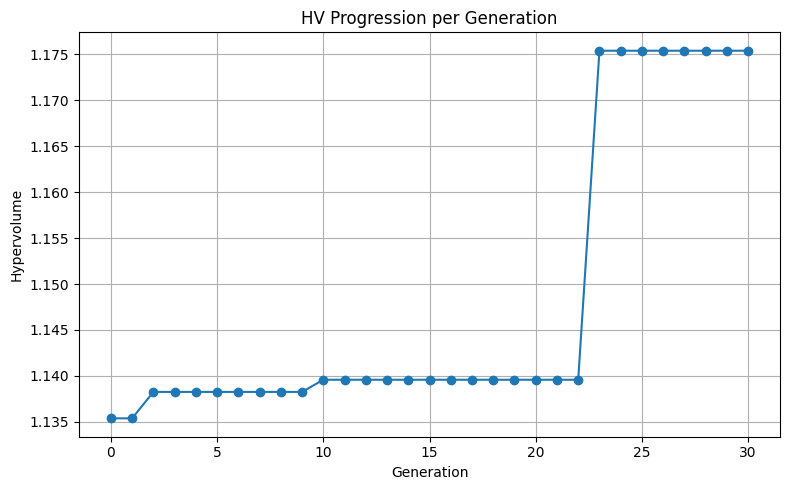

[1.1353747909512275,
 1.1353747909512275,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767]

In [8]:
#Cummulative HV
def calculate_hv_per_generation(folder_path, visualize=True):
    """Calculates HV after each generation."""
    F_hist = read_population_scores_from_folder(folder_path)
    F_hist = [np.array(gen, dtype=float) for gen in F_hist]

    all_F = np.vstack(F_hist)
    approx_ideal = all_F.min(axis=0)
    approx_nadir = all_F.max(axis=0)

    metric = Hypervolume(
        ref_point=np.array([1.1, 1.1]),
        norm_ref_point=False,
        zero_to_one=True,
        ideal=approx_ideal,
        nadir=approx_nadir
    )

    hv_values = []
    for i in range(len(F_hist)):
        # All individuals up to this generation
        data_up_to_now = np.vstack(F_hist[:i+1])
        hv_values.append(metric(data_up_to_now))

    if visualize:
        plt.figure(figsize=(8, 5))
        plt.plot(range(len(hv_values)), hv_values, marker='o', linestyle='-')
        plt.xlabel("Generation")
        plt.ylabel("Hypervolume")
        plt.title("HV Progression per Generation")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return hv_values

calculate_hv_per_generation("logs/momcts/momcts_2/archive")

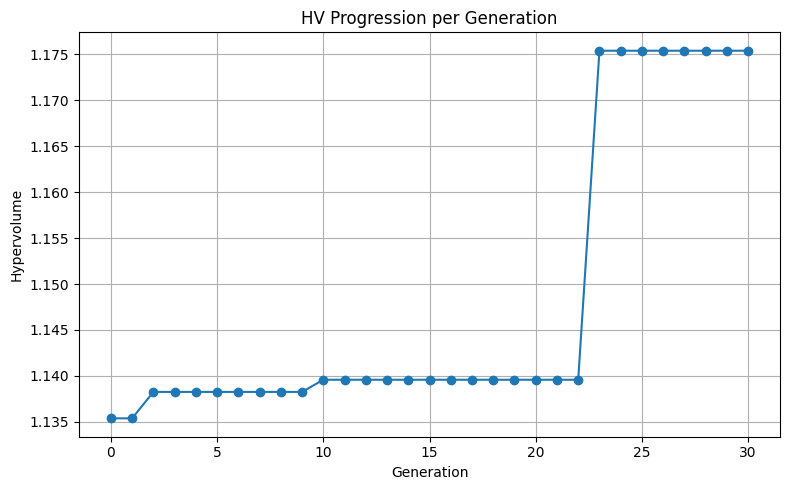

[1.1353747909512275,
 1.1353747909512275,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1382525472108371,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1395762415326738,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767,
 1.1753985289476767]

In [9]:
#Per generation HV
def calculate_hv_per_generation(folder_path, visualize=True):
    """Calculates HV after each generation."""
    F_hist = read_population_scores_from_folder(folder_path)
    F_hist = [np.array(gen, dtype=float) for gen in F_hist]

    all_F = np.vstack(F_hist)
    approx_ideal = all_F.min(axis=0)
    approx_nadir = all_F.max(axis=0)

    metric = Hypervolume(
        ref_point=np.array([1.1, 1.1]),
        norm_ref_point=False,
        zero_to_one=True,
        ideal=approx_ideal,
        nadir=approx_nadir
    )

    hv_values = []
    for gen in F_hist:  # Each gen is already a 2D array of objectives
        hv_values.append(metric(np.array(gen, dtype=float)))


    if visualize:
        plt.figure(figsize=(8, 5))
        plt.plot(range(len(hv_values)), hv_values, marker='o', linestyle='-')
        plt.xlabel("Generation")
        plt.ylabel("Hypervolume")
        plt.title("HV Progression per Generation")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return hv_values

calculate_hv_per_generation("logs/momcts/momcts_2/archive")

# logs/meoh/200_samples_v1/population

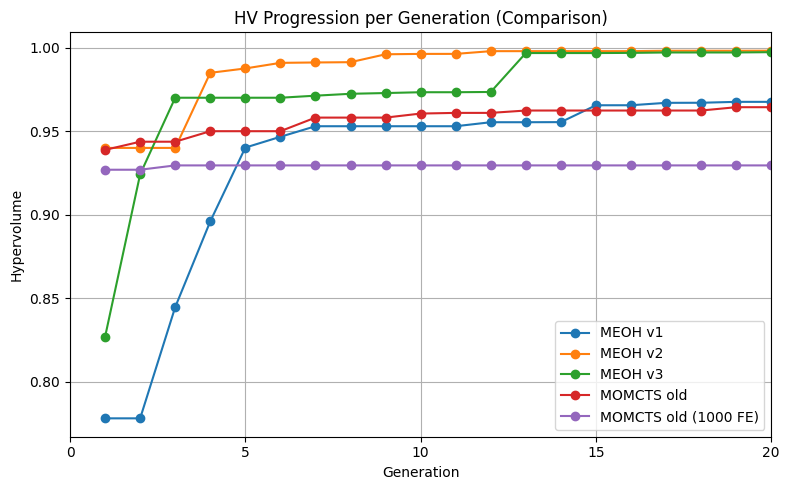

In [14]:
def calculate_hv_per_generation_multiple(folder_paths, labels=None, visualize=True):
    """Calculates HV after each generation for multiple algorithms."""
    plt.figure(figsize=(8, 5))

    for idx, folder_path in enumerate(folder_paths):
        F_hist = read_population_scores_from_folder(folder_path)
        F_hist = [np.array(gen, dtype=float) for gen in F_hist]

        if len(F_hist) == 0:
            continue  # skip if folder has no valid data

        all_F = np.vstack(F_hist)
        approx_ideal = all_F.min(axis=0)
        approx_nadir = all_F.max(axis=0)

        metric = Hypervolume(
            ref_point=np.array([1, 1]),
            norm_ref_point=False,
            zero_to_one=True,
            ideal=approx_ideal,
            nadir=approx_nadir
        )

        hv_values = [metric(np.atleast_2d(gen)) for gen in F_hist[:20]]

        # Use custom labels if provided, otherwise fallback
        if labels and idx < len(labels):
            label_name = labels[idx]
        else:
            label_name = f"{folder_path.split('/')[-2]}_{folder_path.split('/')[-1]}"

        plt.plot(range(1, len(hv_values) + 1), hv_values,
                 marker='o', linestyle='-', label=label_name)

    if visualize:
        plt.xlabel("Generation")
        plt.ylabel("Hypervolume")
        plt.title("HV Progression per Generation (Comparison)")
        plt.grid(True)
        plt.legend()
        plt.xlim(0, 20)  # show 0..20
        plt.xticks([0, 5, 10, 15, 20])  # tick marks at 0,5,10,15,20
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    folders = [
        "logs/meoh/200_samples_v1/population",
        "logs/meoh/200_samples_v2/population",
        "logs/meoh/200_samples_v3/population",
        "logs/momcts/momcts_with_hv/archive",
        "logs/momcts/momcts_with_hv_2/archive"
    ]
    labels = ["MEOH v1", "MEOH v2", "MEOH v3", "MOMCTS old", "MOMCTS old (1000 FE)"]
    calculate_hv_per_generation_multiple(folders, labels)

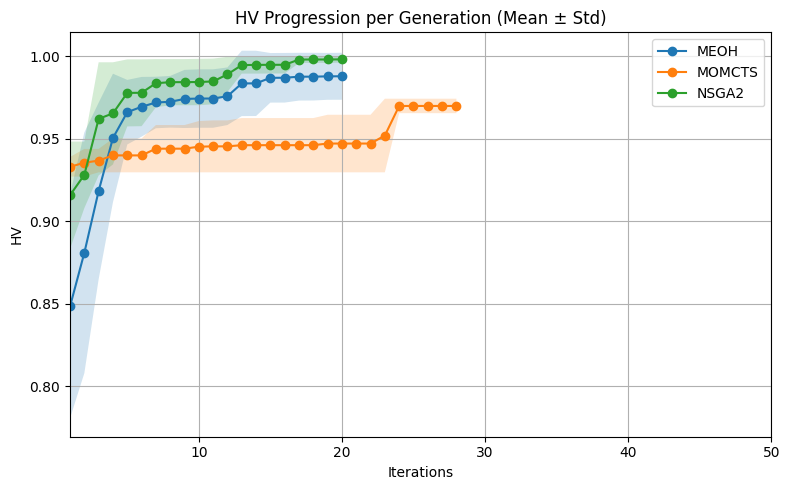

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hv_per_generation_multiple(folder_paths_grouped, labels=None, visualize=True, max_gen=50):
    """
    Calculates mean & std HV per generation for multiple algorithms (each may have multiple runs).
    
    Parameters:
    - folder_paths_grouped: list of lists, each sublist contains folders for one algorithm's runs
    - labels: list of algorithm labels
    - max_gen: maximum number of generations to plot
    """
    plt.figure(figsize=(8, 5))

    for idx, folders in enumerate(folder_paths_grouped):
        hv_runs = []

        for folder_path in folders:
            F_hist = read_population_scores_from_folder(folder_path)
            F_hist = [np.array(gen, dtype=float) for gen in F_hist]

            if len(F_hist) == 0:
                continue  # skip if no valid data

            all_F = np.vstack(F_hist)
            approx_ideal = all_F.min(axis=0)
            approx_nadir = all_F.max(axis=0)

            M = all_F.shape[1]
            ref_point = np.ones(M)

            metric = Hypervolume(
                ref_point=ref_point,
                norm_ref_point=False,
                zero_to_one=True,
                ideal=approx_ideal,
                nadir=approx_nadir
            )

            hv_values = [metric(np.atleast_2d(gen)) for gen in F_hist[:max_gen]]
            hv_runs.append(hv_values)

        # Align runs to same length
        min_len = min(len(run) for run in hv_runs)
        hv_runs = [run[:min_len] for run in hv_runs]

        hv_array = np.array(hv_runs)   # shape: (n_runs, n_gens)
        mean_hv = hv_array.mean(axis=0)
        std_hv = hv_array.std(axis=0)

        # Label
        label_name = labels[idx] if labels and idx < len(labels) else f"Algo {idx+1}"

        # Plot mean ± std
        gens = np.arange(1, len(mean_hv) + 1)
        plt.plot(gens, mean_hv, marker='o', linestyle='-', label=label_name)
        plt.fill_between(gens, mean_hv - std_hv, mean_hv + std_hv, alpha=0.2)

    if visualize:
        plt.xlabel("Iterations")
        plt.ylabel("HV")
        plt.title("HV Progression per Generation (Mean ± Std)")
        plt.grid(True)
        plt.legend()
        plt.xlim(1, max_gen)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    folders_grouped = [
        [
           "logs/meoh/200_samples_v1/population",
            "logs/meoh/200_samples_v2/population",
            "logs/meoh/200_samples_v3/population"
        ],
        [
           "logs/momcts/momcts_with_hv/archive",
            "logs/momcts/momcts_with_hv_2/archive"
        ],
        [
           "logs/nsga2/200_samples_v1/population",
            "logs/nsga2/200_samples_v2/population"
        ]
    ]
    labels = ["MEOH", "MOMCTS", "NSGA2"]
    calculate_hv_per_generation_multiple(folders_grouped, labels)

Z_ideal: [6.29720089e+00 1.10018626e-03], z_nadir: [36.32015521  0.46191607]
Length of hv runs: 3
Min_len: 20
Length of hv runs: 2
Min_len: 28
Length of hv runs: 2
Min_len: 20


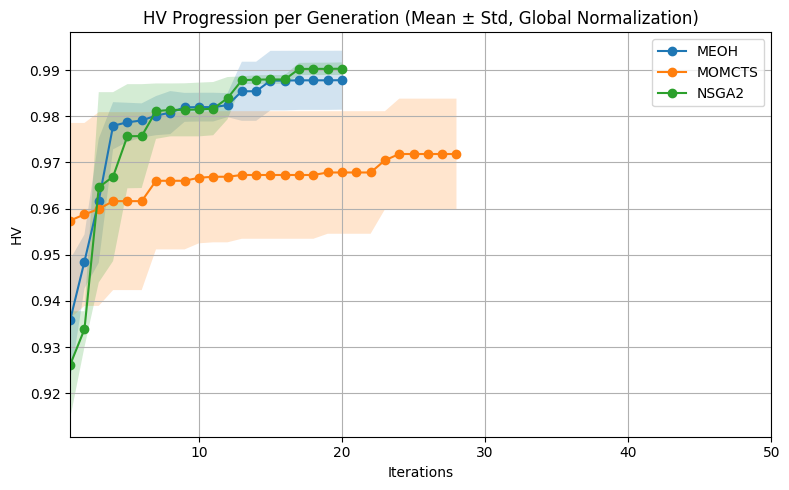

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from utils import read_population_scores_from_folder

def calculate_hv_per_generation_multiple(folder_paths_grouped, labels=None, visualize=True, max_gen=50):
    """
    Calculates mean & std HV per generation for multiple algorithms (each may have multiple runs),
    using global z_ideal and z_nadir across ALL runs/algorithms for fair comparison.
    
    Parameters:
    - folder_paths_grouped: list of lists, each sublist contains folders for one algorithm's runs
    - labels: list of algorithm labels
    - max_gen: maximum number of generations to plot
    """
    # ---------------------------------------------------
    # Pass 1: Collect all objective values across ALL runs
    # ---------------------------------------------------
    all_F_global = []

    for folders in folder_paths_grouped:
        for folder_path in folders:
            F_hist = read_population_scores_from_folder(folder_path)
            F_hist = [np.array(gen, dtype=float) for gen in F_hist]

            if len(F_hist) == 0:
                continue
            all_F_global.append(np.vstack(F_hist))

    if not all_F_global:
        raise ValueError("No valid data found in any folder.")

    all_F_global = np.vstack(all_F_global)
    z_ideal = all_F_global.min(axis=0)
    z_nadir = all_F_global.max(axis=0)
    print(f"Z_ideal: {z_ideal}, z_nadir: {z_nadir}")
    # Reference point (usually (1,1,...,1) after normalization)
    M = all_F_global.shape[1]
    ref_point = np.ones(M)

    # ---------------------------------------------------
    # Pass 2: Compute HV for each run using global bounds
    # ---------------------------------------------------
    plt.figure(figsize=(8, 5))

    for idx, folders in enumerate(folder_paths_grouped):
        hv_runs = []

        for folder_path in folders:
            F_hist = read_population_scores_from_folder(folder_path)
            F_hist = [np.array(gen, dtype=float) for gen in F_hist]

            if len(F_hist) == 0:
                continue

            metric = Hypervolume(
                ref_point=ref_point,
                norm_ref_point=False,
                zero_to_one=True,
                ideal=z_ideal,
                nadir=z_nadir
            )

            hv_values = [metric(np.atleast_2d(gen)) for gen in F_hist[:max_gen]]
            hv_runs.append(hv_values)

        if not hv_runs:
            continue
        print(f"Length of hv runs: {len(hv_runs)}")
        # Align runs to same length
        min_len = min(len(run) for run in hv_runs)
        print(f"Min_len: {min_len}")
        hv_runs = [run[:min_len] for run in hv_runs]

        hv_array = np.array(hv_runs)   # shape: (n_runs, n_gens)
        mean_hv = hv_array.mean(axis=0)
        std_hv = hv_array.std(axis=0)

        # Label
        label_name = labels[idx] if labels and idx < len(labels) else f"Algo {idx+1}"

        # Plot mean ± std
        gens = np.arange(1, len(mean_hv) + 1)
        plt.plot(gens, mean_hv, marker='o', linestyle='-', label=label_name)
        plt.fill_between(gens, mean_hv - std_hv, mean_hv + std_hv, alpha=0.2)

    if visualize:
        plt.xlabel("Iterations")
        plt.ylabel("HV")
        plt.title("HV Progression per Generation (Mean ± Std, Global Normalization)")
        plt.grid(True)
        plt.legend()
        plt.xlim(1, max_gen)
        plt.tight_layout()
        plt.show()
if __name__ == "__main__":
    folders_grouped = [
        [
           "logs/meoh/200_samples_v1/population",
            "logs/meoh/200_samples_v2/population",
            "logs/meoh/200_samples_v3/population"
        ],
        [
           "logs/momcts/momcts_with_hv/archive",
            "logs/momcts/momcts_with_hv_2/archive"
        ],
        [
           "logs/nsga2/200_samples_v1/population",
            "logs/nsga2/200_samples_v2/population"
        ]
    ]
    labels = ["MEOH", "MOMCTS", "NSGA2"]
    calculate_hv_per_generation_multiple(folders_grouped, labels)